# Supervised Learning with Exploratory Data Analysis - Independent Project

## 1. Defining the Question

> ### a) Specifying the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading the Dataset
# Dataset url = https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc 
#
fifa = pd.read_csv("fifa_ranking.csv")
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#
fifa.shape

(57793, 16)

In [4]:
# Previewing the top of our dataset
#
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
# Previewing the bottom of our dataset
#
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [6]:
fifa.rename(columns = {'rank_date': 'date'}, inplace=True)
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date'],
      dtype='object')

In [7]:
results = pd.read_csv("results.csv")
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [8]:
# Determining the no. of records in our dataset
#
results.shape

(40839, 9)

In [9]:
# Previewing the top of our dataset
#
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [10]:
# Previewing the bottom of our dataset
#
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [0]:
df = fifa.merge(results, left_on=['date','country_full'], right_on=['date','country'], how= 'inner')

In [12]:
# Checking the size of our dataframe
#
df.shape

(950, 24)

In [13]:
# Previewing the shape of our dataset
#
df.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date', 'home_team',
       'away_team', 'home_score', 'away_score', 'tournament', 'city',
       'country', 'neutral'],
      dtype='object')

In [14]:
# Previewing the top of our dataset
#
df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False
1,35,Ecuador,ECU,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False
2,50,Zimbabwe,ZIM,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,Harare,Zimbabwe,False
3,59,Bolivia,BOL,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
4,65,Guinea,GUI,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False


In [15]:
# Previewing the bottom of our dataset
#
df.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
945,12,England,ENG,1050.84,1040,1,476.42,476.42,593.51,296.75,580.49,174.15,517.60,103.52,UEFA,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,True
946,14,Uruguay,URU,1018.41,976,3,486.28,486.28,487.69,243.84,561.47,168.44,599.26,119.85,CONMEBOL,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,Montevideo,Uruguay,False
947,22,Iceland,ISL,908.01,930,0,438.64,438.64,564.25,282.13,302.02,90.61,483.19,96.64,UEFA,2018-06-07,Iceland,Ghana,2,2,Friendly,Reykjavík,Iceland,False
948,26,Austria,AUT,844.70,841,0,456.27,456.27,229.28,114.64,503.42,151.02,613.80,122.76,UEFA,2018-06-07,South Korea,Bolivia,0,0,Friendly,Innsbruck,Austria,True
949,97,India,IND,349.92,354,0,196.24,196.24,222.36,111.18,85.00,25.50,85.00,17.00,AFC,2018-06-07,India,New Zealand,1,2,Intercontinental Cup,Mumbai,India,False


In [16]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 949
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     950 non-null    int64  
 1   country_full             950 non-null    object 
 2   country_abrv             950 non-null    object 
 3   total_points             950 non-null    float64
 4   previous_points          950 non-null    int64  
 5   rank_change              950 non-null    int64  
 6   cur_year_avg             950 non-null    float64
 7   cur_year_avg_weighted    950 non-null    float64
 8   last_year_avg            950 non-null    float64
 9   last_year_avg_weighted   950 non-null    float64
 10  two_year_ago_avg         950 non-null    float64
 11  two_year_ago_weighted    950 non-null    float64
 12  three_year_ago_avg       950 non-null    float64
 13  three_year_ago_weighted  950 non-null    float64
 14  confederation            9

## 4. External Data Source Validation

## 5. Tidying the Dataset

In [17]:
# Identifying the Missing Data
#
df.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
dtype: int64

In [18]:
# More data cleaning procedures
#
df.duplicated().any()

False

In [0]:
numeric = df[['rank', 'total_points','previous_points', 'rank_change',\
              'cur_year_avg','cur_year_avg_weighted', 'last_year_avg',\
              'last_year_avg_weighted','two_year_ago_avg', 'two_year_ago_weighted',\
              'three_year_ago_avg','three_year_ago_weighted', 'home_score', 'away_score']]

> ### a) **Checking for outliers**

In [0]:
plt.style.use('bmh')

 Outlier ranges are:
 [[], [260.28, 245.77, 970.35, 363.85, 256.97, 781.33, 258.03, 718.86, 556.72, 477.42, 477.42, 477.42, 74.62, 74.62, 623.14, 401.9, 41.83, 159.65, 369.37, 145.51, 422.76, 130.22, 758.81, 392.72, 280.76, 280.76, 576.33, 576.33, 741.5, 741.5, 741.5, 741.5, 203.23, 300.3, 73.86, 72.77, 55.4, 1268.57, 1053.99, 1012.06, 940.16, 635.13, 634.73, 569.51, 547.63, 502.53, 483.58, 453.28, 393.34, 386.27, 355.73, 349.52, 347.41, 347.41, 329.32, 329.32, 291.32, 280.58, 241.1, 201.22, 495.36, 293.13, 293.13, 402.03, 1069.42, 260.39, 260.39, 260.39, 260.39, 149.87, 116.0, 115.18, 114.85, 93.94, 415.12, 765.39, 1332.16, 1263.29, 280.11, 128.28, 128.28, 747.72, 747.72, 1273.69, 1050.84, 1050.84, 1050.84, 1050.84, 1050.84, 1050.84, 1050.84, 1050.84, 1018.41, 908.01, 844.7, 349.92], [1550.0, 1462.0, 1462.0, 1462.0, 1434.0, 1616.0, 1357.0, 1357.0, 1357.0, 1323.0, 1663.0, 1663.0, 1389.0, 1683.0], [-7.0, -10.0, -8.0, -8.0, -9.0, -8.0, -7.0, -10.0, -7.0, -9.0, -10.0, -8.0, -7.0, -12.0, -

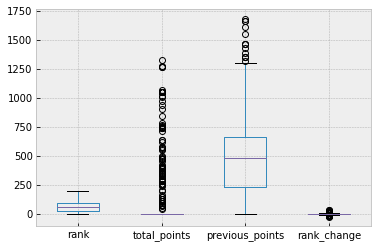

In [21]:
# Checking for Outliers
#
n1 = df[['rank', 'total_points','previous_points', 'rank_change']]
# Plotting ourliters for the numeric columns
#
_t, n_columns = pd.DataFrame.boxplot(n1, return_type='both', widths=0.5)

outliers = [flier.get_ydata() for flier in n_columns['fliers']]
out_list = [i.tolist() for i in outliers]

print(f" Outlier ranges are:\n { out_list}")

 Outlier ranges are:
 [[183.89, 111.99, 474.78, 168.08, 146.28, 365.28, 214.82, 445.32, 253.95, 283.51, 283.51, 283.51, 74.62, 74.62, 406.45, 222.17, 25.8, 173.94, 63.23, 147.53, 84.03, 405.61, 147.85, 166.44, 166.44, 355.32, 355.32, 311.79, 311.79, 311.79, 311.79, 137.84, 34.0, 42.5, 530.35, 308.58, 469.01, 593.07, 419.51, 285.17, 294.57, 364.41, 277.91, 251.15, 184.85, 242.15, 298.06, 102.61, 160.94, 173.25, 173.25, 102.38, 102.38, 93.12, 131.81, 123.61, 134.25, 275.43, 136.07, 136.07, 168.1, 544.52, 165.72, 165.72, 165.72, 165.72, 67.47, 56.23, 69.35, 68.0, 65.61, 198.84, 543.68, 855.3, 788.68, 109.65, 55.08, 55.08, 465.52, 465.52, 646.92, 476.42, 476.42, 476.42, 476.42, 476.42, 476.42, 476.42, 476.42, 486.28, 438.64, 456.27, 196.24], [183.89, 111.99, 474.78, 168.08, 146.28, 365.28, 214.82, 445.32, 253.95, 283.51, 283.51, 283.51, 74.62, 74.62, 406.45, 222.17, 25.8, 173.94, 63.23, 147.53, 84.03, 405.61, 147.85, 166.44, 166.44, 355.32, 355.32, 311.79, 311.79, 311.79, 311.79, 137.84, 3

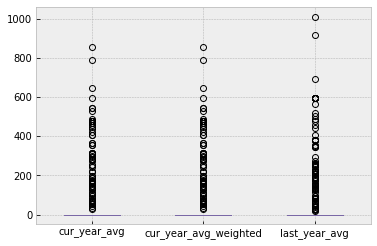

In [22]:
# Checking for Outliers
#
n2 = df[['cur_year_avg','cur_year_avg_weighted', 'last_year_avg']]
# Plotting ourliters for the numeric columns
#
_t, n_columns = pd.DataFrame.boxplot(n2, return_type='both', widths=0.5)

outliers = [flier.get_ydata() for flier in n_columns['fliers']]
out_list = [i.tolist() for i in outliers]

print(f" Outlier ranges are:\n { out_list}")

 Outlier ranges are:
 [[34.43, 61.53, 238.77, 103.8, 30.62, 203.16, 18.71, 123.23, 87.22, 92.98, 92.98, 92.98, 106.59, 113.06, 33.33, 70.63, 113.85, 42.75, 136.5, 29.19, 221.83, 129.63, 64.11, 64.11, 67.62, 67.62, 189.66, 189.66, 189.66, 189.66, 94.83, 71.82, 29.29, 12.9, 457.59, 504.47, 252.53, 124.62, 103.53, 227.75, 130.93, 40.13, 77.8, 123.39, 108.74, 74.85, 41.88, 125.09, 111.4, 93.47, 93.47, 125.27, 125.27, 127.95, 75.96, 58.31, 7.91, 85.58, 46.97, 46.97, 189.77, 260.16, 13.61, 13.61, 13.61, 13.61, 24.86, 23.64, 21.25, 12.54, 146.2, 93.92, 175.63, 177.66, 78.84, 42.5, 42.5, 173.14, 173.14, 345.91, 296.75, 296.75, 296.75, 296.75, 296.75, 296.75, 296.75, 296.75, 243.84, 282.13, 114.64, 111.18], [60.92, 129.94, 570.52, 170.11, 200.03, 375.65, 393.35, 371.13, 182.01, 182.01, 182.01, 235.69, 186.24, 129.21, 134.18, 20.0, 357.49, 321.75, 234.32, 117.72, 117.72, 273.01, 273.01, 477.31, 477.31, 477.31, 477.31, 255.95, 174.41, 105.97, 64.5, 748.61, 646.31, 544.15, 368.25, 312.85, 210.38, 

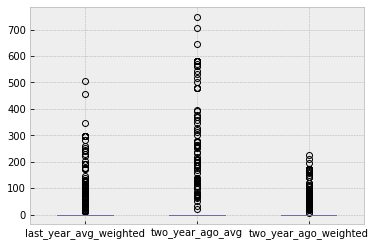

In [23]:
# Checking for Outliers
#
n2 = df[['last_year_avg_weighted','two_year_ago_avg', 'two_year_ago_weighted']]
# Plotting ourliters for the numeric columns
#
_t, n_columns = pd.DataFrame.boxplot(n2, return_type='both', widths=0.5)

outliers = [flier.get_ydata() for flier in n_columns['fliers']]
out_list = [i.tolist() for i in outliers]

print(f" Outlier ranges are:\n { out_list}")

 Outlier ranges are:
 [[118.41, 166.33, 428.22, 204.72, 100.3, 500.94, 122.49, 161.5, 521.05, 231.67, 231.67, 231.67, 196.93, 54.02, 42.5, 122.28, 206.63, 167.64, 157.38, 85.0, 174.22, 224.72, 74.46, 74.46, 357.49, 357.49, 484.32, 484.32, 484.32, 484.32, 158.08, 191.58, 63.92, 32.59, 64.5, 280.23, 235.19, 636.36, 559.93, 91.17, 293.5, 323.93, 335.1, 140.29, 128.36, 280.83, 198.8, 29.17, 222.17, 147.63, 210.96, 210.96, 212.42, 212.42, 161.48, 154.28, 117.18, 134.38, 179.55, 240.32, 240.32, 115.62, 526.81, 203.6, 203.6, 203.6, 203.6, 184.73, 67.37, 73.46, 87.55, 143.64, 247.79, 449.18, 640.01, 130.09, 37.84, 37.84, 148.47, 148.47, 627.63, 517.6, 517.6, 517.6, 517.6, 517.6, 517.6, 517.6, 517.6, 599.26, 483.19, 613.8, 85.0], [23.68, 33.27, 85.64, 40.94, 20.06, 100.19, 24.5, 32.3, 104.21, 46.33, 46.33, 46.33, 39.39, 10.8, 8.5, 24.46, 41.33, 33.53, 31.48, 17.0, 34.84, 44.94, 14.89, 14.89, 71.5, 71.5, 96.86, 96.86, 96.86, 96.86, 31.62, 38.32, 12.78, 6.52, 12.9, 56.05, 47.04, 127.27, 111.99, 1

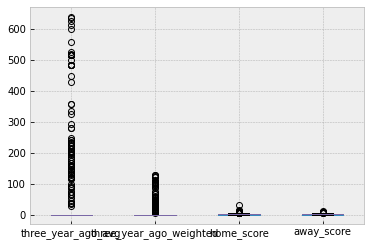

In [24]:
# Checking for Outliers
#
n2 = df[['three_year_ago_avg','three_year_ago_weighted', 'home_score', 'away_score']]
# Plotting ourliters for the numeric columns
#
_t, n_columns = pd.DataFrame.boxplot(n2, return_type='both', widths=0.5)

outliers = [flier.get_ydata() for flier in n_columns['fliers']]
out_list = [i.tolist() for i in outliers]

print(f" Outlier ranges are:\n { out_list}")

In [0]:
# Function for counting number of outliers in our data columns and cheking the percentage for each
# ----
#
def detect_outlier(data):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [26]:
# Counting number of outliers in our data columns and cheking the percentage for each column using z-score
#
#
for col in numeric:
    rows, columns = numeric.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(numeric[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

rank has 0 outliers in total, which is 0.0% of data
total_points has 33 outliers in total, which is 3.5% of data
previous_points has 9 outliers in total, which is 0.95% of data
rank_change has 27 outliers in total, which is 2.8% of data
cur_year_avg has 30 outliers in total, which is 3.2% of data
cur_year_avg_weighted has 30 outliers in total, which is 3.2% of data
last_year_avg has 28 outliers in total, which is 2.9% of data
last_year_avg_weighted has 28 outliers in total, which is 2.9% of data
two_year_ago_avg has 30 outliers in total, which is 3.2% of data
two_year_ago_weighted has 30 outliers in total, which is 3.2% of data
three_year_ago_avg has 28 outliers in total, which is 2.9% of data
three_year_ago_weighted has 28 outliers in total, which is 2.9% of data
home_score has 13 outliers in total, which is 1.4% of data
away_score has 13 outliers in total, which is 1.4% of data


> ### b) **Removing Outliers**

In [27]:
# Getting ouliers from our dataframe using a z-test
#
from scipy import stats

z = np.abs(stats.zscore(numeric))
print(z)

[[1.18429616 0.27459093 1.31880111 ... 0.26890015 0.34305852 0.03412453]
 [0.62237984 0.27459093 1.41946941 ... 0.26890015 1.7427373  0.84458201]
 [0.3102041  0.27459093 1.40688587 ... 0.26890015 0.17839043 0.84458201]
 ...
 [0.89293214 4.5035079  1.43384776 ... 4.84402256 0.17839043 0.77633296]
 [0.80968528 4.17036021 1.15386404 ... 6.22595076 0.86450748 0.84458201]
 [0.66794654 1.566746   0.37818167 ... 0.63051713 0.34305852 0.77633296]]


In [28]:
# Dropping and Confirming that our outliers have been dropped from the dataset.
#
df_o = numeric[(z < 3).all(axis=1)]

print(f"Previous dataframe size : {numeric.shape[0]}")
print(f"New dataframe size: {df_o.shape[0]}")

Previous dataframe size : 950
New dataframe size: 850


In [0]:
category = df[['country_full', 'country_abrv', 'confederation',\
               'date', 'tournament',\
               'city', 'country', 'neutral']]
game = df[['home_team', 'away_team']]

In [0]:
df_o = pd.concat([game, category, df_o], axis=1)

In [0]:
df_o.to_csv('clean_fifa.csv')

In [32]:
fifa_df = pd.read_csv("clean_fifa.csv")
fifa_df.columns

Index(['Unnamed: 0', 'home_team', 'away_team', 'country_full', 'country_abrv',
       'confederation', 'date', 'tournament', 'city', 'country', 'neutral',
       'rank', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'home_score',
       'away_score'],
      dtype='object')

In [0]:
fifa_df.dropna(inplace=True)

In [34]:
# Previewing the top of our dataset
#
fifa_df.head()

,Unnamed: 0,home_team,away_team,country_full,country_abrv,confederation,date,tournament,city,country,neutral,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
0,0,Brazil,Mexico,Brazil,BRA,CONMEBOL,1993-08-08,Friendly,Maceió,Brazil,False,8.0,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2,Zimbabwe,Eswatini,Zimbabwe,ZIM,CAF,1993-08-08,Friendly,Harare,Zimbabwe,False,50.0,0.0,27.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,4,Guinea,Sierra Leone,Guinea,GUI,CAF,1993-08-08,Friendly,Conakry,Guinea,False,65.0,0.0,23.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,5,Paraguay,Argentina,Paraguay,PAR,CONMEBOL,1993-08-08,FIFA World Cup qualification,Asunción,Paraguay,False,67.0,0.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
6,6,Peru,Colombia,Peru,PER,CONMEBOL,1993-08-08,FIFA World Cup qualification,Lima,Peru,False,70.0,0.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


> ### c) Label Encoding

In [35]:
# Previewing our categorical columns
#
category = df[['tournament']]
category.head()

,tournament
0,Friendly
1,FIFA World Cup qualification
2,Friendly
3,FIFA World Cup qualification
4,Friendly


In [0]:

# Label encoding categorical columns
#

from sklearn.preprocessing import LabelEncoder
le_ = LabelEncoder()

In [37]:
# Apply the label encoder for every categorical column
#
for i, col_val in enumerate(category):
  category[col_val] = le_.fit_transform(category[col_val])

category.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,tournament
0,18
1,17
2,18
3,17
4,18


In [0]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder
ohe = OneHotEncoder()

tourn = ohe.fit_transform(fifa_df['tournament'].values.reshape(-1,1)).toarray()
OneHot3 = pd.DataFrame(tourn)


In [39]:
# Joining the dataframes
#
fifa_new = pd.concat([df[['home_team', 'away_team']], numeric,OneHot3], axis=1)
fifa_new.head()

,home_team,away_team,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,Brazil,Mexico,8,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ecuador,Venezuela,35,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Zimbabwe,Eswatini,50,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bolivia,Uruguay,59,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Guinea,Sierra Leone,65,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# Preview the size of our new dataframe
#
fifa_new.shape

(950, 49)

In [41]:
# Checking for null values
#
fifa_new.isnull().sum()

home_team                    0
away_team                    0
rank                         0
total_points                 0
previous_points              0
rank_change                  0
cur_year_avg                 0
cur_year_avg_weighted        0
last_year_avg                0
last_year_avg_weighted       0
two_year_ago_avg             0
two_year_ago_weighted        0
three_year_ago_avg           0
three_year_ago_weighted      0
home_score                   0
away_score                   0
0                          100
1                          100
2                          100
3                          100
4                          100
5                          100
6                          100
7                          100
8                          100
9                          100
10                         100
11                         100
12                         100
13                         100
14                         100
15                         100
16      

In [42]:
# Dropping null values
#
fifa_new.dropna(inplace=True)
fifa_new.isnull().sum()

home_team                  0
away_team                  0
rank                       0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
home_score                 0
away_score                 0
0                          0
1                          0
2                          0
3                          0
4                          0
5                          0
6                          0
7                          0
8                          0
9                          0
10                         0
11                         0
12                         0
13                         0
14                         0
15                         0
16                         0
17                         0
18            

In [43]:
# Checking for duplicate values
#
fifa_new.duplicated().sum()

0

In [0]:
# Exporting our clean and encoded dataset
#
fifa_new.to_csv("fifa_encoded.csv")

## 6. Exploratory Analysis

In [45]:
# reading our new dataset.
#
fifa_df = pd.read_csv("fifa_encoded.csv")
fifa_df.head()

,Unnamed: 0,home_team,away_team,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0,Brazil,Mexico,8,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Ecuador,Venezuela,35,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Zimbabwe,Eswatini,50,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Bolivia,Uruguay,59,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Guinea,Sierra Leone,65,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Univariate summaries**

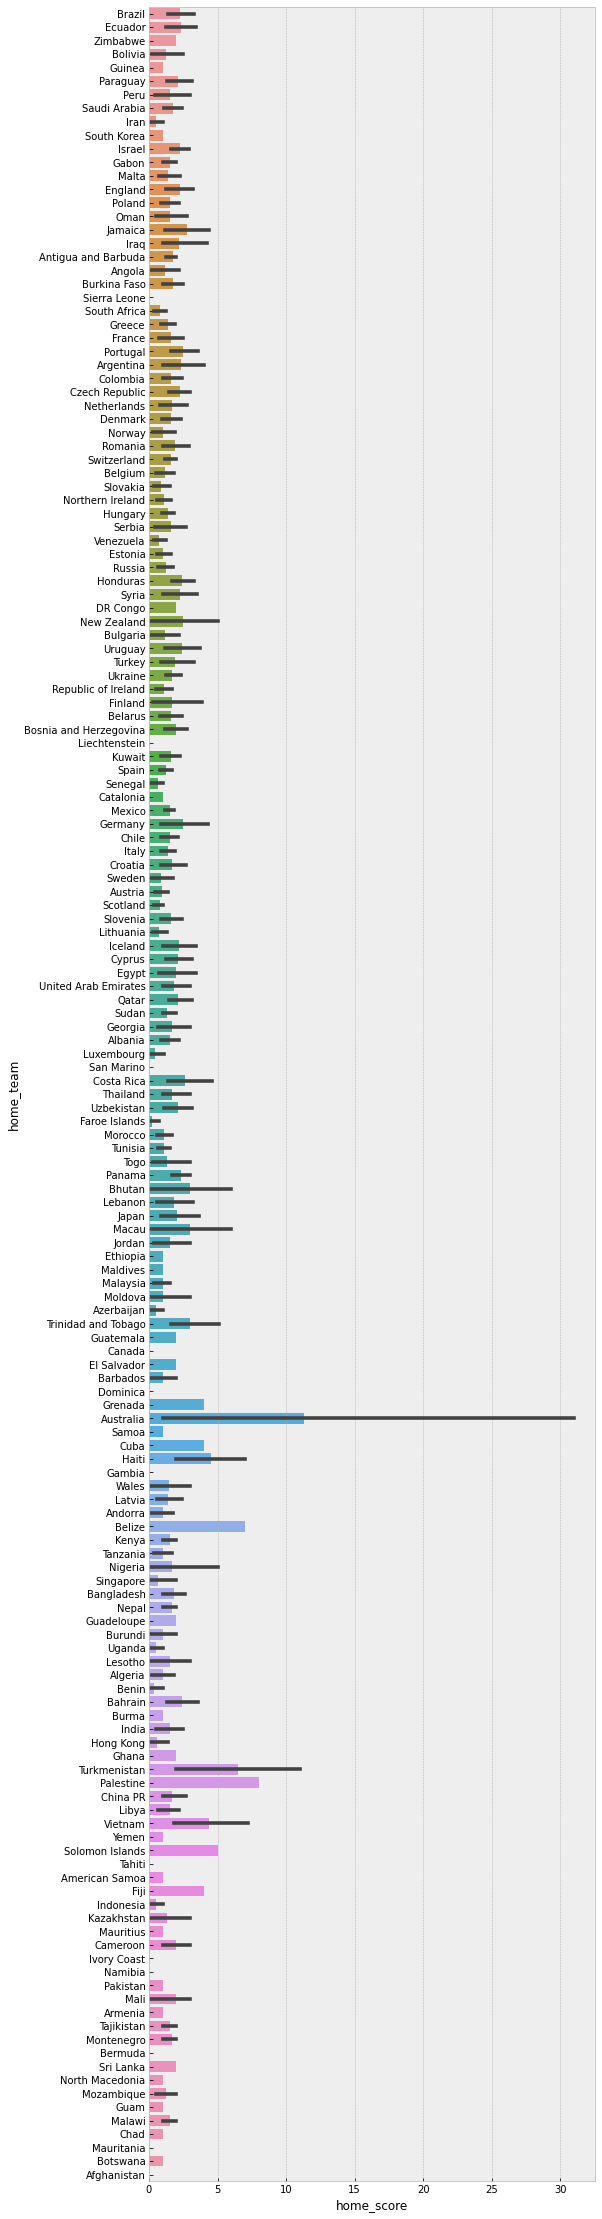

In [46]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(8,40))
sns.barplot(x=fifa_new['home_score'], y= fifa_new['home_team'], ax=ax)

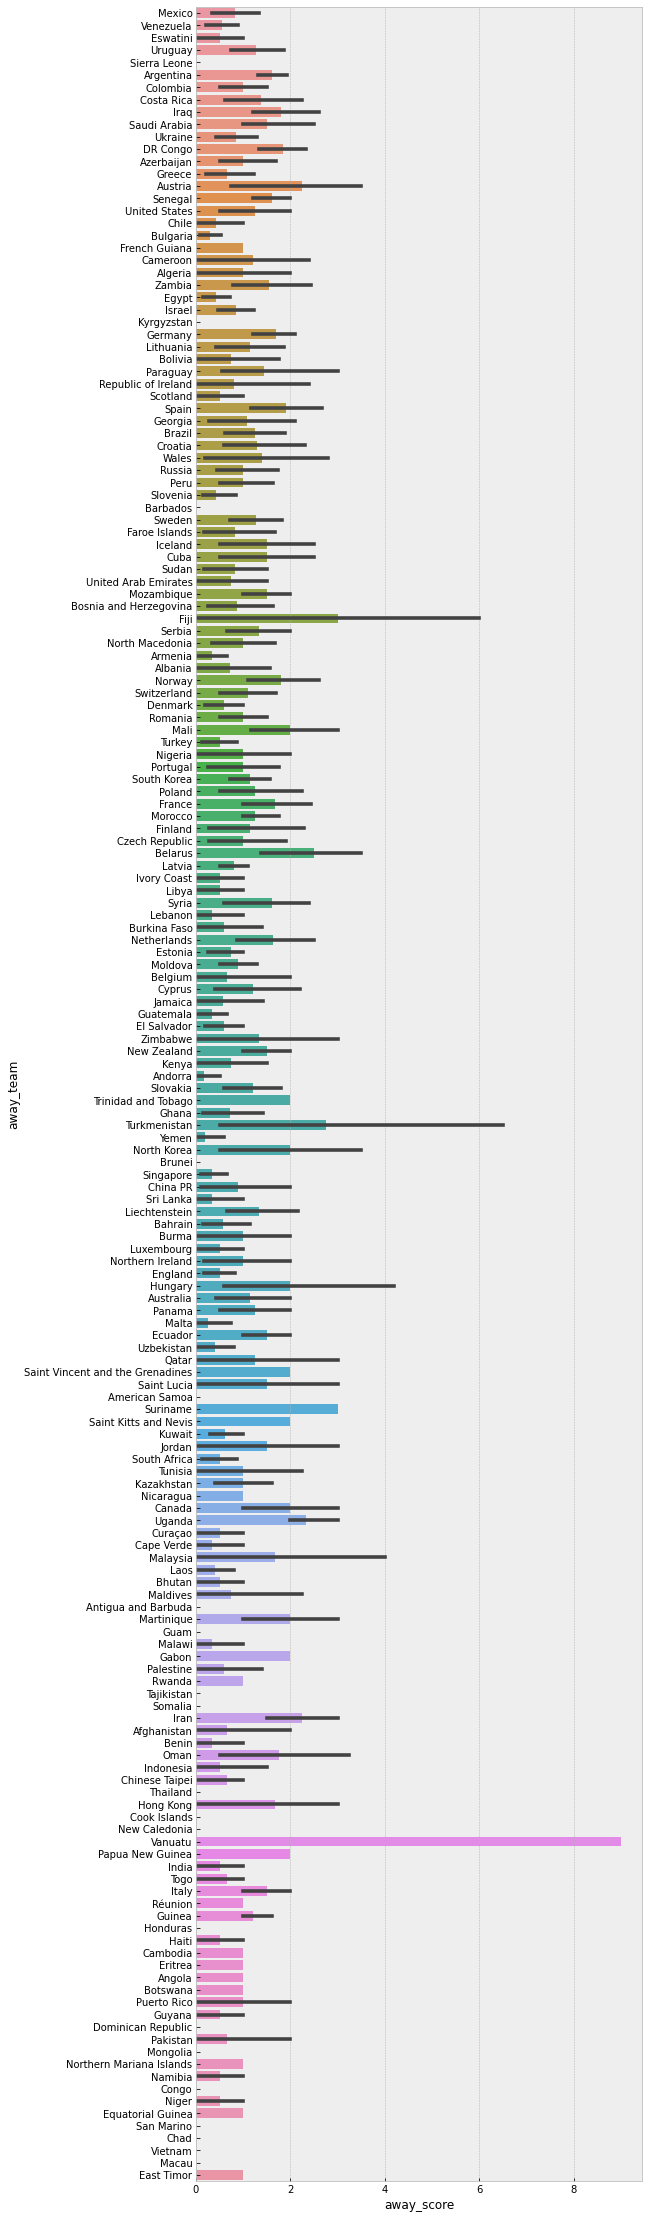

In [47]:
# Ploting the univariate summaries and recording our observations
#
# Away score against Away team
#
fig, ax = plt.subplots(figsize=(8,40))
sns.barplot(x=fifa_new['away_score'], y = fifa_new['away_team'], ax=ax)

In [0]:
numerical = ['rank', 'total_points','previous_points', 'rank_change',\
              'cur_year_avg','cur_year_avg_weighted', 'last_year_avg',\
              'last_year_avg_weighted','two_year_ago_avg', 'two_year_ago_weighted',\
              'three_year_ago_avg','three_year_ago_weighted', 'home_score', 'away_score']


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

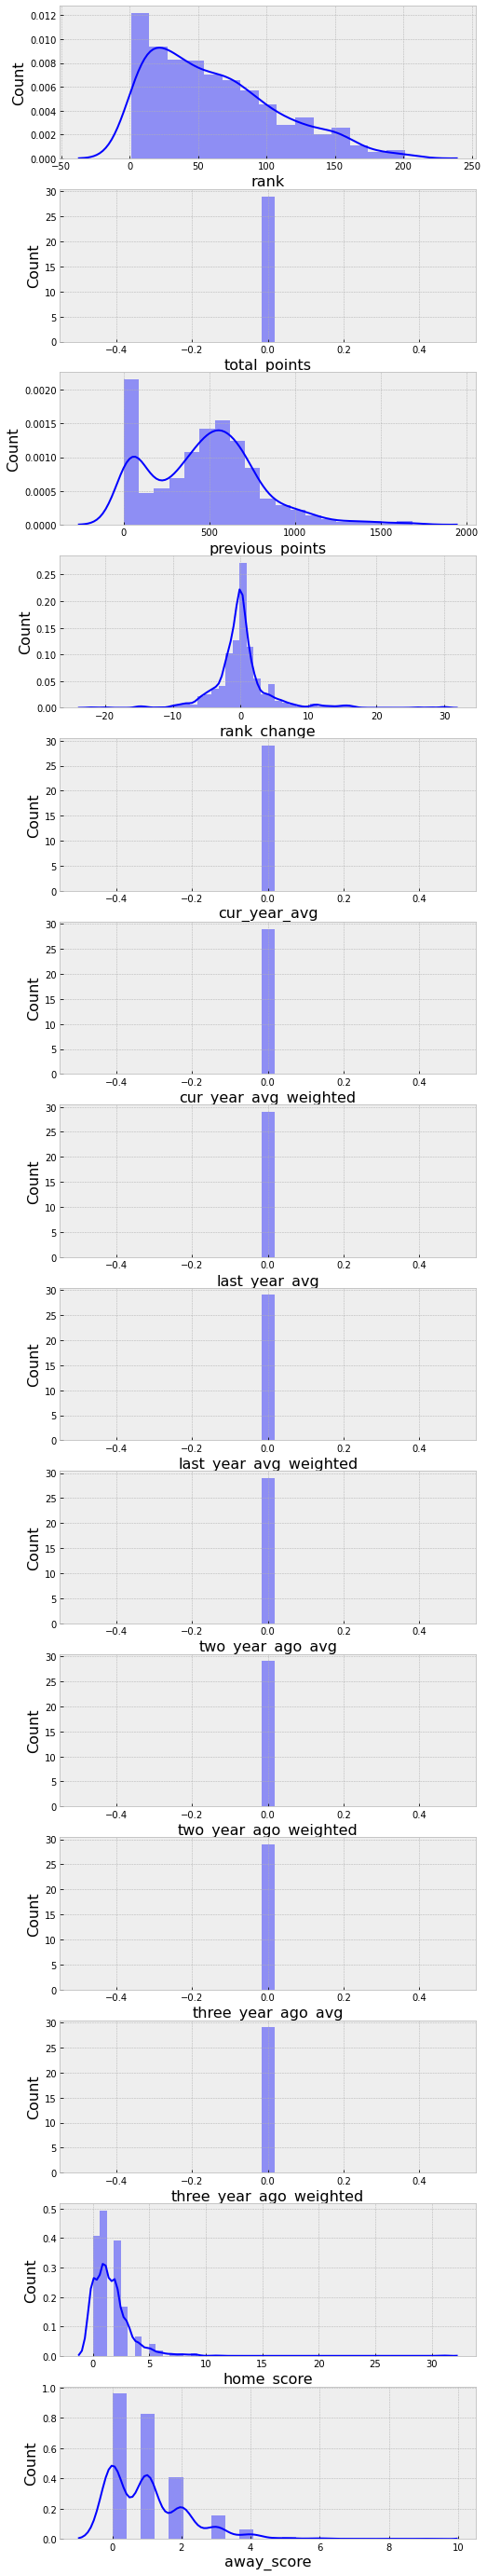

In [49]:
fig, ax = plt.subplots(numeric.shape[1], figsize=(8,50))

for i, col_val in enumerate(numerical):
  sns.distplot(fifa_new[col_val], hist=True, ax=ax[i], color='blue')
  ax[i].set_xlabel(col_val, fontsize=16)
  ax[i].set_ylabel('Count', fontsize=16)

plt.show()

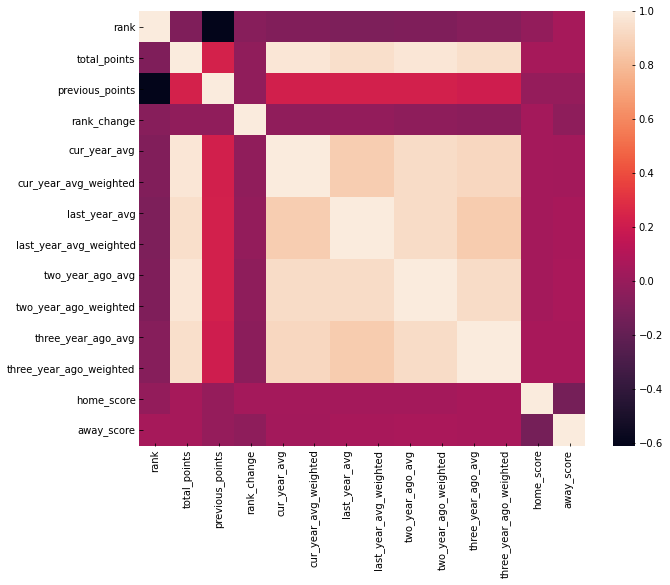

In [50]:
# Correlation Matrix
# ----
f, ax = plt.subplots(figsize=(10,8))
corr = numeric.corr()
sns.heatmap(corr,\
           xticklabels=corr.columns.values,\
           yticklabels=corr.columns.values)

## 7. Implementing the Solution

In [51]:
# Identify unnecessary columns
#
bad_col = fifa_new.iloc[:, 6:14].columns
bad_col

Index(['cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted'],
      dtype='object')

In [52]:
# Dropping bad unnecessary columns
#
for i, col_val in enumerate(bad_col):
  fifa_new.drop([col_val], axis=1, inplace=True)

fifa_new.columns

Index([      'home_team',       'away_team',            'rank',
          'total_points', 'previous_points',     'rank_change',
            'home_score',      'away_score',                 0,
                       1,                 2,                 3,
                       4,                 5,                 6,
                       7,                 8,                 9,
                      10,                11,                12,
                      13,                14,                15,
                      16,                17,                18,
                      19,                20,                21,
                      22,                23,                24,
                      25,                26,                27,
                      28,                29,                30,
                      31,                32],
      dtype='object')

# **Polynormial Regression**

In [53]:
# Checking the head of our dataframe
#
fifa_new = pd.DataFrame(fifa_new)
fifa_new.head()

,home_team,away_team,rank,total_points,previous_points,rank_change,home_score,away_score,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,Brazil,Mexico,8,0.0,55,-5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ecuador,Venezuela,35,0.0,23,30,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Zimbabwe,Eswatini,50,0.0,27,4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bolivia,Uruguay,59,0.0,13,28,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Guinea,Sierra Leone,65,0.0,23,-2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Home Score Dataframe
#
home_df = fifa_new[['away_score', 'home_score', 'rank']]
h_df = fifa_new.iloc[:, 14:]
home_df = pd.concat([home_df, h_df], axis=1)
home_df.head()

,away_score,home_score,rank,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,1,1,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,5,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
home = home_df.groupby(['rank'])['home_score'].sum()
away = home_df.groupby(['rank'])['away_score'].sum()

In [0]:
# Split the data into features and Labels
#
X = home
y = away


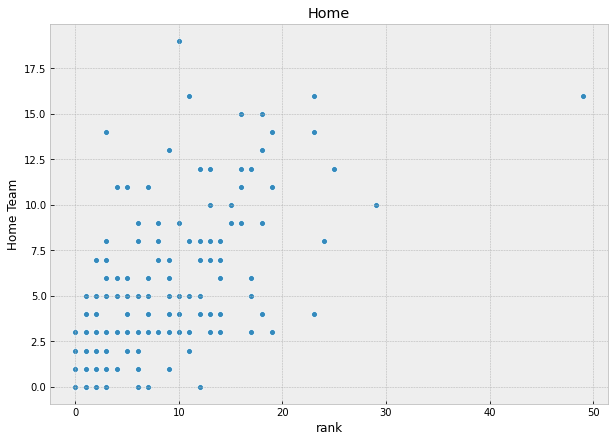

In [57]:
# Since our dataset is pretty clean, let's start by visualizing our dataset by plotting a scatter plot
#
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot(X, y, palette='hls') 
plt.title('Home')
plt.xlabel('rank')
plt.ylabel('Home Team')
plt.show()

In [0]:
# Split the data into features and Labels
#
X = home.values.reshape(-1,1)
y = away.values.reshape(-1,1)


ValueError: ignored

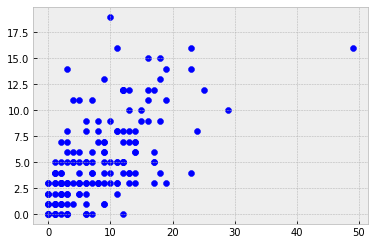

In [68]:
# Splitting our data into training and test sets:
#
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, train_size=0.8, test_size = 0.2, random_state=0)


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X_poly,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Game Prediction for Home teams')
plt.xlabel('Home score')
plt.ylabel('Home Team')
plt.show()

# **Logistic Regression**

In [69]:
fifa_new.columns

Index([      'home_team',       'away_team',            'rank',
          'total_points', 'previous_points',     'rank_change',
            'home_score',      'away_score',                 0,
                       1,                 2,                 3,
                       4,                 5,                 6,
                       7,                 8,                 9,
                      10,                11,                12,
                      13,                14,                15,
                      16,                17,                18,
                      19,                20,                21,
                      22,                23,                24,
                      25,                26,                27,
                      28,                29,                30,
                      31,                32],
      dtype='object')

In [70]:
fifa_new.head()

,home_team,away_team,rank,total_points,previous_points,rank_change,home_score,away_score,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,Brazil,Mexico,8,0.0,55,-5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ecuador,Venezuela,35,0.0,23,30,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Zimbabwe,Eswatini,50,0.0,27,4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bolivia,Uruguay,59,0.0,13,28,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Guinea,Sierra Leone,65,0.0,23,-2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
fifa_new.isnull().values.sum()

0

In [72]:
# Checking where Home Team won
#
win = fifa_new[fifa_new['home_score'] > fifa_new['away_score']]
loss = fifa_new[fifa_new['home_score'] < fifa_new['away_score']]
draw = fifa_new[fifa_new['home_score'] == fifa_new['away_score']]
 
print(f"Home teams Win count:  {win.shape[0]}")
print(f"Home teams Loss count: {loss.shape[0]}")
print(f"Home teams Draw count: {draw.shape[0]}")

# We clearly see that most teams win when playing on their home ground
#

Home teams Win count:  411
Home teams Loss count: 222
Home teams Draw count: 217


**Observation**

We can see that most teams have high chances of winning when playing on their home ground. 

The number of draws is a bit higher than the number of losses for teams playing on their home ground.

In [0]:
# Splitting the dataset
#
X = win.iloc[:, 2:]
y = win['away_score']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=60)


In [74]:
# Fitting our model
#
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [75]:
# Using our model to make predictions
#
y_pred = LogReg.predict(X_test)
y_pred

array([0, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1])

In [76]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[69,  1,  3,  0,  0],
       [ 1, 35,  1,  0,  0],
       [ 0,  8,  2,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  1,  0,  0,  0]])

In [77]:
# Checking the Accuracy of our Model
#
from sklearn import metrics

print(f" Model Accuracy is: {metrics.accuracy_score(y_test, y_pred)}")

 Model Accuracy is: 0.8548387096774194


In [78]:
# Calculating the RMSE,MSE and the MAE
#
print(f" Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f" Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}")
print(f" Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

 Mean Absolute Error: 0.20967741935483872
 Mean Squared Error: 0.3548387096774194
 Root Mean Squared Error: 0.5956833971812706
